In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

**Important feature that I will take to classification:**
- Grid Ref: Easting    
- Grid Ref: Northing 
- Time (24hr)
- Road Surface       
- Lighting Conditions  
- Weather Conditions   
- Type of Vehicle      
- Casualty Class       
- Casualty Severity (**class**)
- Sex of Casualty      
- Age of Casualty      

# 1. Import the dataset¶

In [2]:
files_path = '/Users/marysia/Desktop/Traffic accident'
files_list = os.listdir(files_path)
files_list.remove('.DS_Store')

In [3]:
files_list

['combined_csv.csv',
 '2015.csv',
 'RTC 2018_Leeds.csv',
 '2014.csv',
 'Copy of Leeds_RTC_2016.csv',
 'Leeds_RTC_2017.csv',
 'Traffic accidents_2019_Leeds.csv']

In [4]:
all_columns = []

In [5]:
na_values = ['N','NAN','Nan','UNKNOWN', 'Unknown', 'NaN', 'UNK','', 'U', 'Unclassified'] # add all values that should be converted to np.nan

def data_frame(file):
    """Return the dataframe and list of column name"""
    df=pd.read_csv(os.path.join(files_path,file), na_values= na_values, low_memory=False, encoding="ISO-8859-1")
    df_column = list(df.columns)
    print(df_column)
    print("--------")

    
    return df_column, df

In [6]:
columns_19, df_19 = data_frame('Traffic accidents_2019_Leeds.csv')
columns_18, df_18 = data_frame('RTC 2018_Leeds.csv')
columns_17, df_17 = data_frame('Leeds_RTC_2017.csv')
columns_16, df_16 = data_frame('Copy of Leeds_RTC_2016.csv')
columns_15, df_15 = data_frame('2015.csv')
columns_14, df_14 = data_frame('2014.csv')

['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Number', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty']
--------
['Accident Fields_Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Fields_Reference Number', 'Vehicle Number', 'Type of Vehicle', 'Casualty Fields_Reference Number', 'Casualty Veh No', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty']
--------
['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class & No', 'Road Surface', 'Lighting Con

In [7]:
#Check if there is some differences in column name between columns in the single dataset
res = [x for x in columns_18 + columns_14 + 
       columns_16 + columns_17 + columns_19 if x not in columns_18 or x not in columns_14 or x not in 
       columns_16 or x not in columns_17 or x not in columns_19]

print(res)

['Accident Fields_Reference Number', '1st Road Class', '1st Road Class & No', 'Local Authority', 'Vehicle Fields_Reference Number', 'Vehicle Number', 'Casualty Fields_Reference Number', 'Casualty Veh No', 'Reference Number', '1st Road Class', 'Unnamed: 11', 'Reference Number', 'Expr1', '1st Road Class', 'Reference Number', '1st Road Class & No', 'Reference Number', '1st Road Class', '1st Road Class & No', 'Local Authority', 'Vehicle Number']


In [8]:
#Check if there is some differences in between column name in df_19 and df_18 
res = [x for x in columns_18 + columns_19 if x not in columns_18 or x not in columns_19]
print(res)

['Accident Fields_Reference Number', 'Vehicle Fields_Reference Number', 'Casualty Fields_Reference Number', 'Casualty Veh No', 'Reference Number']


There is the diffrent column name:
- **Accident Fields_Reference Number** - different name for "Reference Number" in df_18
- **Vehicle Fields_Reference Number** - this field only exist in df_18
- **Casualty Fields_Reference Number** - this field only exist in df_18
- **Casualty Veh No** - different name for "Vehicle Number" in df_18
- **'1st Road Class'** exist only in df_18 and df_19
- **'Local Authority'** exist only in df_18 and df_19
- **'Unnamed: 11'** in df_14 the same as 'Casualty Class'	but with string
- **"Expr1"** only in df_16 

In [9]:
#Change columns name in df_18 
#df_18.rename(columns = {'Accident Fields_Reference Number':'Reference Number', 'Casualty Veh No': 'Vehicle Number'}, inplace = True)
#columns_18 = list(df_18.columns)

In [10]:
df_19.head()

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,6
1,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,9
2,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,39
3,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,5
4,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,8


In [11]:
df_18.head()

,Accident Fields_Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Local Authority,Vehicle Fields_Reference Number,Vehicle Number,Type of Vehicle,Casualty Fields_Reference Number,Casualty Veh No,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,51B0230,433936,428874,1,11/01/2018,700,6,NaN,1,4,...,E08000035,51B0230,1,9,51B0230,1,3,3,2,87
1,51B0349,430076,433872,1,11/01/2018,855,6,NaN,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,60
2,51B0349,430076,433872,1,11/01/2018,855,6,NaN,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,51
3,51B0349,430076,433872,1,11/01/2018,855,6,NaN,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,50
4,51B0349,430076,433872,1,11/01/2018,855,6,NaN,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,51


In [12]:
df_17.head()

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,3AP0313,426340,428455,1,3/17/2017,815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
1,3BE0850,430828,433222,2,1/14/2017,1330,A61,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Driver or rider,Slight,Male,36
2,4110858,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,32
3,4110858,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,30
4,4111495,429899,434277,2,1/1/2017,1705,NaN,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Vehicle or pillion passenger,Slight,Female,26


In [13]:
df_16.head()

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Expr1,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,2181280,418241,442351,2,Leeds 2016,08/01/2016,1905,A,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Serious,Male,38,Motorcycle over 500cc
1,2191037,424993,432898,2,Leeds 2016,09/01/2016,1615,NaN,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Slight,Female,50,Car
2,2CQ0870,431159,436397,2,Leeds 2016,15/01/2016,1645,NaN,Dry,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Male,26,Car
3,2CQ0870,431159,436397,2,Leeds 2016,15/01/2016,1645,NaN,Dry,Daylight: street lights present,Fine without high winds,Vehicle or pillion passenger,Slight,Female,22,Car
4,3111091,439313,432376,2,Leeds 2016,01/01/2016,956,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Male,57,Pedal cycle


In [14]:
df_15.head()

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,21G0539,427798,426248,5,16-Jan-15,1205,A,Snow,Daylight: street lights present,Snowing without high winds,Driver/Rider,Slight,Male,36,Goods vehicle 3.5 tonnes mgw and under
1,21G0539,427798,426248,5,16-Jan-15,1205,A,Snow,Daylight: street lights present,Snowing without high winds,Passenger,Slight,Male,27,Goods vehicle 3.5 tonnes mgw and under
2,21G1108,431142,430087,1,16-Jan-15,1732,NaN,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,68,Car
3,21H0565,434602,436699,2,17-Jan-15,930,NaN,Dry,Daylight: street lights present,Fine without high winds,Driver/Rider,Slight,Male,49,Car
4,21H0638,434254,434318,2,17-Jan-15,1315,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver/Rider,Slight,Male,33,Car


In [15]:
df_14.head()

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Unnamed: 11,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1112091,429175,431904,2,01-Jan-14,1840,NaN,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,1,Driver,Slight,Male,58,Car
1,1180869,430429,431025,3,08-Jan-14,1430,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,69,Car
2,1180869,430429,431025,3,08-Jan-14,1430,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Female,41,Car
3,11A0238,424660,427582,3,10-Jan-14,817,Motorway,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,35,Car
4,11A0238,424660,427582,3,10-Jan-14,817,Motorway,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,25,Car


In [16]:
#Merge the data
df_all = pd.concat([df_19, df_18, df_17, df_16, df_14])
df_all.T

,0,1,2,3,4,5,6,7,8,9,...,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532
Reference Number,58F1730,58F1730,58F1730,58F1730,58F1730,58F1730,58F1730,6111190,6111674,6111836,...,1CT0467,1CT0467,1CT1319,1CU0553,1CU0802,1CV0080,1CV0542,2130577,21D1298,25D0630
Grid Ref: Easting,436147,436147,436147,436147,436147,436147,436147,435904,423194,429149,...,426865,426865,425800,421674,429119,428839,436092,426119,430261,430906
Grid Ref: Northing,434957,434957,434957,434957,434957,434957,434957,425850,438111,431736,...,437535,437535,428414,434229,430977,433995,434785,426906,431186,433484
Number of Vehicles,2,2,2,2,2,2,2,2,1,2,...,2,2,2,1,2,1,2,1,1,2
Accident Date,15/08/2019,15/08/2019,15/08/2019,15/08/2019,15/08/2019,15/08/2019,15/08/2019,01/01/2019,01/01/2019,01/01/2019,...,30-Dec-14,30-Dec-14,29-Dec-14,30-Dec-14,30-Dec-14,31-Dec-14,31-Dec-14,25-Dec-14,27-Dec-14,13-May-14
Time (24hr),1812,1812,1812,1812,1812,1812,1812,1007,1505,1640,...,1154,1154,2025,1335,1554,153,1310,830,50,1220
1st Road Class,3,3,3,3,3,3,3,3,6,6,...,A,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Road Class & No,A6120,A6120,A6120,A6120,A6120,A6120,A6120,A642,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Road Surface,1,1,1,1,1,1,1,1,1,1,...,Wet / Damp,Wet / Damp,Wet / Damp,Wet / Damp,Wet / Damp,Wet / Damp,Wet / Damp,Dry,Dry,Dry
Lighting Conditions,1,1,1,1,1,1,1,1,1,4,...,Daylight: street lights present,Daylight: street lights present,Darkness: street lights present and lit,Daylight: street lights present,Daylight: street lights present,Darkness: street lights present and lit,Daylight: street lights present,Daylight: street lights present,Darkness: street lighting unknown,Daylight: street lights present


# 2. Data analysis

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11187 entries, 0 to 2532
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Reference Number                  9192 non-null   object 
 1   Grid Ref: Easting                 11187 non-null  int64  
 2   Grid Ref: Northing                11187 non-null  int64  
 3   Number of Vehicles                11187 non-null  int64  
 4   Accident Date                     11187 non-null  object 
 5   Time (24hr)                       11187 non-null  int64  
 6   1st Road Class                    6324 non-null   object 
 7   1st Road Class & No               2904 non-null   object 
 8   Road Surface                      11186 non-null  object 
 9   Lighting Conditions               11187 non-null  object 
 10  Weather Conditions                10909 non-null  object 
 11  Local Authority                   3902 non-null   object 
 12  Vehic

### Change the data type

In several columns the values reperesented the same variable have the different name (format). So I sholud change the string data for float type. I used the accident guidance of data for that.

In [18]:
df_all['Casualty Severity'].replace(['Fatal', 'Serious', 'Slight'],
                        [1, 2, 3], inplace=True)

df_all['Road Surface'].replace(['Dry','Wet / Damp', 'Snow', 'Frost / Ice', 'Flood (surface water over 3cm deep)'],
                        [1, 2, 3, 4, 5], inplace=True)

df_all['Sex of Casualty'].replace(['Male', 'Female'],
                        [1, 2], inplace=True)

df_all['Casualty Class'].replace(['Driver or rider', 'Vehicle or pillion passenger', 'Pedestrian'],
                        [1, 2, 3], inplace=True)

df_all['Type of Vehicle'].replace(['Pedal cycle', 'M/cycle 50cc and under',  'Motorcycle over 50cc and up to 125cc', 'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc', '[Not used]', 'Taxi/Private hire car', 'Car', 'Minibus (8 ñ 16 passenger seats)','Bus or coach (17 or more passenger seats)', 'Other motor vehicle', 'Other non-motor vehicle', 'Ridden horse', 'Agricultural vehicle (includes diggers etc.)', 'Tram / Light rail', 'Goods vehicle 3.5 tonnes mgw and under', 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw', 'Goods vehicle 7.5 tonnes mgw and over', 'Mobility Scooter', 'Other Vehicle', 'Motorcycle - Unknown CC', 'Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc', 'Motorcycle Motorcycle over 500cc0cc and under', 'Motorcycle Motorcycle over 500cc0cc to 12Motorcycle over 500cccc' ],
                        [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, None, None, 23, 24, 25], inplace=True)

df_all['Weather Conditions'].replace(['Fine without high winds', 'Raining without high winds', 'Snowing without high winds', 'Fine with high winds', 'Raining with high winds', 'Snowing with high winds', 'Fog or mist ñ if hazard', 'Other', 'Unknown'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

df_all['Lighting Conditions'].replace(['Daylight: street lights present', 'Daylight: no street lighting', 'Daylight: street lighting unknown', 'Darkness: street lights present and lit', 'Darkness: street lights present but unlit', 'Darkness: no street lighting', 'Darkness: street lighting unknown'],
                        [1, 2, 3, 4, 5, 6, 7] , inplace=True)

df_all['1st Road Class'].replace(['Motorway', 'A(M)', 'A', 'B', 'C', 'Unclassified'],
                        [1, 2, 3, 4, 5, 6], inplace=True)

In [19]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11187 entries, 0 to 2532
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Reference Number                  9192 non-null   object 
 1   Grid Ref: Easting                 11187 non-null  int64  
 2   Grid Ref: Northing                11187 non-null  int64  
 3   Number of Vehicles                11187 non-null  int64  
 4   Accident Date                     11187 non-null  object 
 5   Time (24hr)                       11187 non-null  int64  
 6   1st Road Class                    6324 non-null   float64
 7   1st Road Class & No               2904 non-null   object 
 8   Road Surface                      11186 non-null  object 
 9   Lighting Conditions               11187 non-null  object 
 10  Weather Conditions                10909 non-null  object 
 11  Local Authority                   3902 non-null   object 
 12  Vehic

In [20]:
df_all.columns

Index(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing',
       'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class',
       '1st Road Class & No', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Local Authority', 'Vehicle Number',
       'Type of Vehicle', 'Casualty Class', 'Casualty Severity',
       'Sex of Casualty', 'Age of Casualty',
       'Accident Fields_Reference Number', 'Vehicle Fields_Reference Number',
       'Casualty Fields_Reference Number', 'Casualty Veh No', 'Expr1',
       'Unnamed: 11'],
      dtype='object')

**There are still several string values.** Therefore, I check which string type values are still in the dataframe and then convert them to numerical values.

In [21]:
weather_list = list(df_all['Weather Conditions'])
for i in weather_list:
    if type(i) ==str:
        print(i)

Fog or mist (if hazard)
Fog or mist (if hazard)
Fog or mist (if hazard)
Fog or mist  if hazard
Fog or mist  if hazard
Fog or mist  if hazard
Fog or mist  if hazard
Darkness: street lighting unknown
Darkness: street lighting unknown


In [22]:
df_all['Weather Conditions'].replace(['Fog or mist (if hazard)', 'Snowing without high winds', 'Fog or mist   if hazardn', 'Fog or mist  if hazard', 'Darkness: street lighting unknown'],
                        [7, 7, 7, 7, 9], inplace=True)

In [23]:
road_list = list(df_all['Road Surface'])

for i in road_list:
        if type(i) == str:
            print(i)

Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Frost/Ice
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Frost/Ice
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Frost/Ice
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Frost/Ice
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Damp
Wet/Da

In [24]:
df_all['Road Surface'].replace(['Wet/Damp', 'Frost/Ice'],
                        [2, 4], inplace=True)

In [25]:
lighting_list = list(df_all['Lighting Conditions'])

for i in lighting_list:
        if type(i) == str:
            print(i)

Daylight: Street lights present
Daylight: Street lights present
Daylight: Street lights present
Daylight: Street lights present
Darkness: Street lights present and lit
Daylight: Street lights present
Daylight: Street lights present
Daylight: Street lights present
Darkness: No street lighting
Darkness: No street lighting
Darkness: No street lighting
Darkness: Street lights present and lit
Darkness: Street lights present and lit
Daylight: Street lights present
Daylight: Street lights present
Daylight: Street lights present
Daylight: Street lights present
Daylight: Street lights present
Darkness: Street lights present and lit
Darkness: Street lights present and lit
Darkness: Street lights present and lit
Daylight: Street lights present
Daylight: Street lights present
Daylight: Street lights present
Darkness: Street lighting unknown
Darkness: Street lights present and lit
Darkness: Street lights present and lit
Darkness: Street lights present and lit
Darkness: Street lights present and lit

In [26]:
df_all['Lighting Conditions'].replace(['Daylight: Street lights present', 'Daylight: no street lighting', 'Daylight: street lighting unknown', 'Darkness: Street lights present and lit', 'Darkness: Street lights present but unlit', 'Darkness: No street lighting', 'Darkness: Street lighting unknown', 'Darkness: Street lights present and lit and lit'],
                        [1, 2, 3, 4, 5, 6, 7, None] , inplace=True)

In [27]:
veh_type_list = list(df_all['Type of Vehicle'])

for i in veh_type_list:
        if type(i) == str:
            print(i)

Car0
Car0
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cycleCar
Motorcycle Motorcycle over 500cc0cc and underPedal cycle
Pedal cycleCar
Pedal cycleCar
Motorcycle Motorcycle over 500cc0cc and under0
Motorcycle Motorcycle over 500cc0cc and under0
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Car0
Pedal cycleCar
Pedal cycleCar
Pedal cycleCar
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Car7
Pedal cycleCar
Pedal cycleCar
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cycleCar
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Motorcycle Motorcycle over 500cc0cc and underPedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Pedal cycleCar
Pedal cycleCar
Pedal cycleCar
Pedal cyclePedal cycle
Pedal cyclePedal cycle
Motorcycle Motorcycle over 500cc0cc and under0
Pedal cyclePedal cycle
Pedal cyclePedal

In [28]:
df_all['Type of Vehicle'].replace(['Car0', 'Pedal cyclePedal cycle', 'Pedal cycleCar', 'Motorcycle Motorcycle over 500cc0cc and underPedal cycle', 'Car7', 'Motorcycle Motorcycle over 500cc0cc and under0', 'Pedal cycle0', 'CarTaxi/Private hire car', 'Minibus (8  16 passenger seats)', 'Other Vehicle', 'Minibus (8  16 passenger seats)', 'Other Vehicle ', 'Motorcycle Motorcycle over 500cc0cc and underMotorcycle Motorcycle over 500cc0cc and under'],
                        [26, 27, 28, 29, 30, 31, 32, 33, 34, None, 10, None, 35], inplace=True)


In [29]:
first_road_list = list(df_all['1st Road Class'])

for i in first_road_list:
        if type(i) == str:
            print(i)

In [30]:
result_A = [x for x in first_road_list if isinstance(x, str) and "A" in x and "(M)" not in x]
result_AM = [x for x in first_road_list if isinstance(x, str) and "A" in x and "(M)" in x]
result_B = [x for x in first_road_list if isinstance(x, str) and "B" in x ]
result_M = [x for x in first_road_list if isinstance(x, str) and "M" in x]
result_C = [x for x in first_road_list if isinstance(x, str) and "C" in x]

In [31]:
df_all['1st Road Class'].replace(result_M,
                        [1] * len(result_M), inplace=True)

df_all['1st Road Class'].replace(result_A,
                        [2] * len(result_A), inplace=True)

df_all['1st Road Class'].replace(result_AM,
                        [3] * len(result_AM), inplace=True)

df_all['1st Road Class'].replace(result_B,
                        [4] * len(result_B), inplace=True)

df_all['1st Road Class'].replace(result_C,
                        [5] * len(result_C), inplace=True)

In [32]:
df_all['1st Road Class'].replace(result_M,
                        [1] * len(result_M), inplace=True)

df_all['1st Road Class'].replace(result_A,
                        [2] * len(result_A), inplace=True)

df_all['1st Road Class'].replace(result_AM,
                        [3] * len(result_AM), inplace=True)

df_all['1st Road Class'].replace(result_B,
                        [4] * len(result_B), inplace=True)

df_all['1st Road Class'].replace(result_C,
                        [5] * len(result_C), inplace=True)

In [33]:
df_all['1st Road Class'].replace([6],
                        [None], inplace=True)

df_all['Weather Conditions'].replace([9],
                        [None], inplace=True)

df_all['Type of Vehicle'].replace([6, 7, 12, 13],
                        [6, 6, 6, 6], inplace=True)

In [34]:
df_all.isna().sum()

Reference Number                    1995
Grid Ref: Easting                      0
Grid Ref: Northing                     0
Number of Vehicles                     0
Accident Date                          0
Time (24hr)                            0
1st Road Class                      6932
1st Road Class & No                 8283
Road Surface                           1
Lighting Conditions                    1
Weather Conditions                   282
Local Authority                     7285
Vehicle Number                      7285
Type of Vehicle                       19
Casualty Class                         0
Casualty Severity                      0
Sex of Casualty                        0
Age of Casualty                        0
Accident Fields_Reference Number    9192
Vehicle Fields_Reference Number     9192
Casualty Fields_Reference Number    9192
Casualty Veh No                     9192
Expr1                               8638
Unnamed: 11                         8654
dtype: int64

In [35]:
df_all.describe()

,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Time (24hr),Road Surface,Lighting Conditions,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Casualty Veh No
count,11187.000000,11187.000000,11187.000000,11187.000000,11186.000000,11186.000000,3902.000000,11168.000000,11187.000000,11187.000000,11187.000000,11187.000000,1995.000000
mean,429996.189416,434163.659694,1.925360,1405.961473,1.285089,2.116753,1.530497,8.612554,1.566461,2.840976,1.415750,35.725038,1.504261
std,5047.574431,4477.371821,0.756087,508.404806,0.532355,1.787693,0.616751,5.569401,0.748043,0.388243,0.492873,18.621049,0.612767
min,414745.000000,423157.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000
25%,427196.500000,431696.000000,1.000000,1036.000000,1.000000,1.000000,1.000000,9.000000,1.000000,3.000000,1.000000,22.000000,1.000000
50%,429948.000000,434092.000000,2.000000,1505.000000,1.000000,1.000000,1.000000,9.000000,1.000000,3.000000,1.000000,32.000000,1.000000
75%,432148.500000,436054.500000,2.000000,1800.000000,2.000000,4.000000,2.000000,9.000000,2.000000,3.000000,2.000000,48.000000,2.000000
max,445976.000000,449694.000000,10.000000,2358.000000,9.000000,7.000000,7.000000,97.000000,3.000000,3.000000,2.000000,97.000000,7.000000


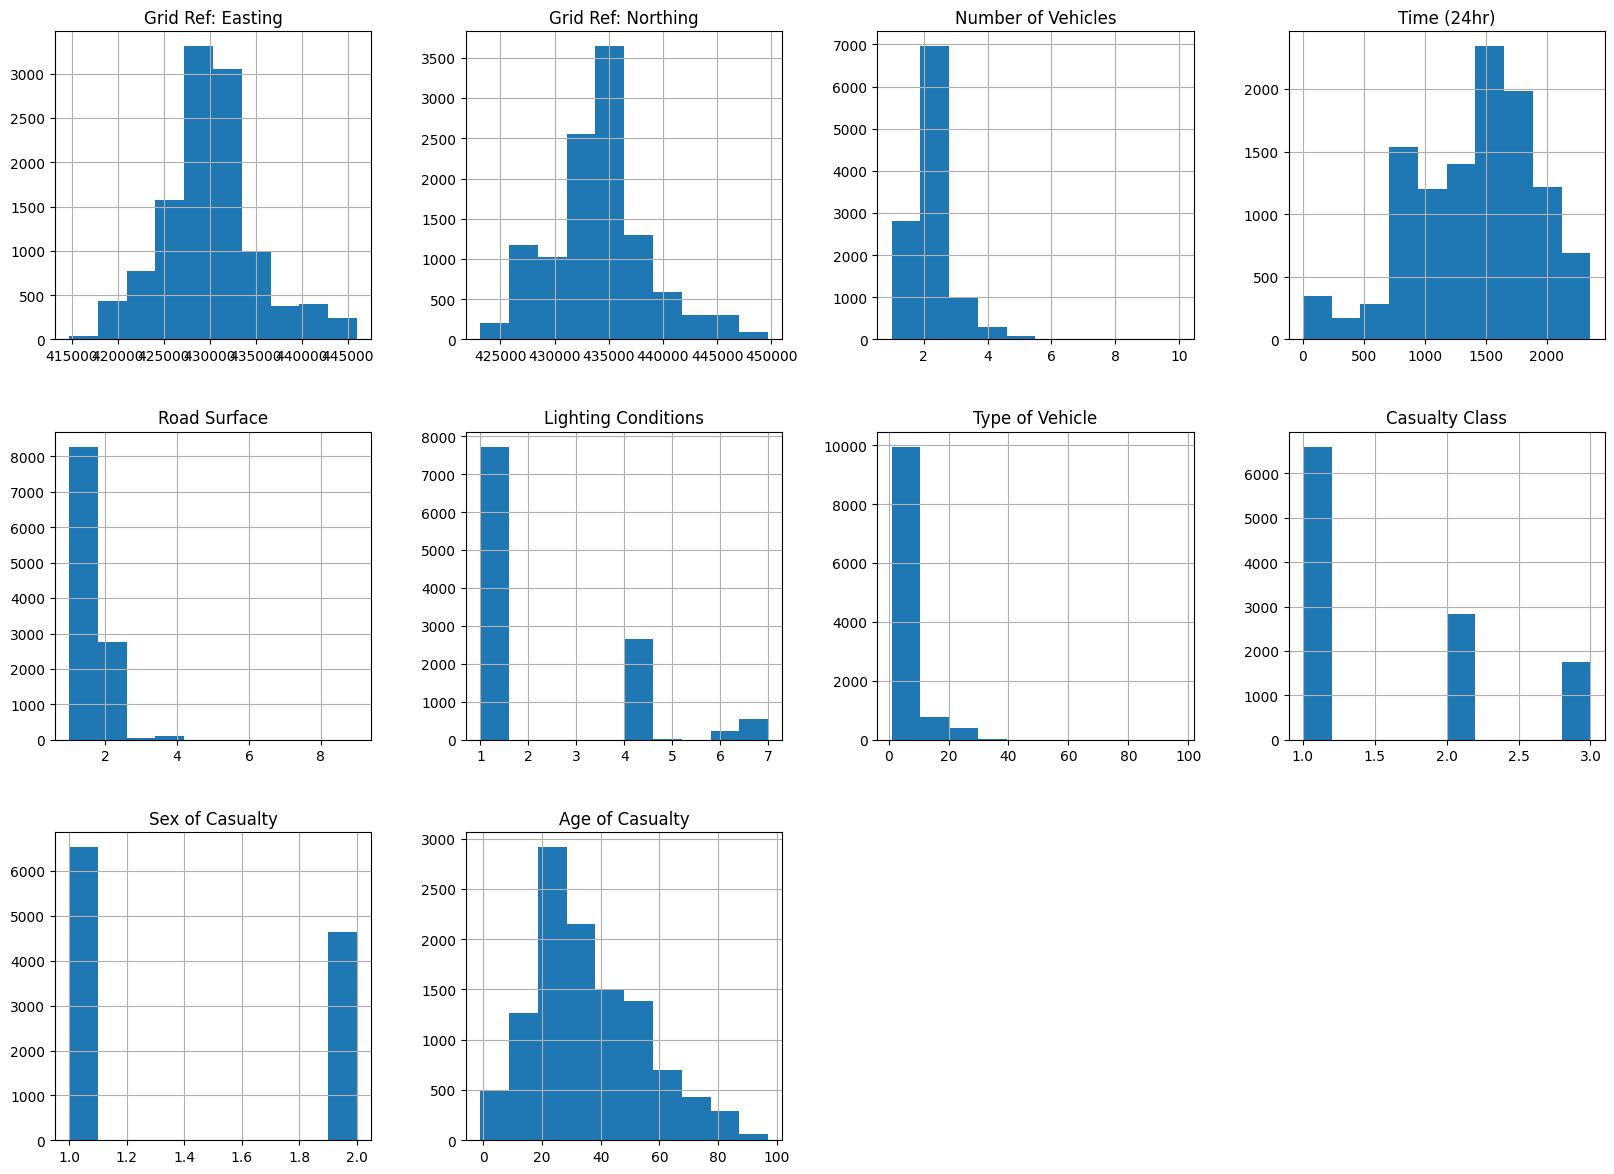

In [36]:
from matplotlib import pyplot as plt
df_all[['Grid Ref: Easting', 'Grid Ref: Northing',
       'Number of Vehicles', 'Time (24hr)', '1st Road Class',
       'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 
        'Sex of Casualty', 'Age of Casualty'
       ]].hist(bins = 10,layout = (6,4),figsize = (20,30)) #, 'Speed Limit'
plt.show()

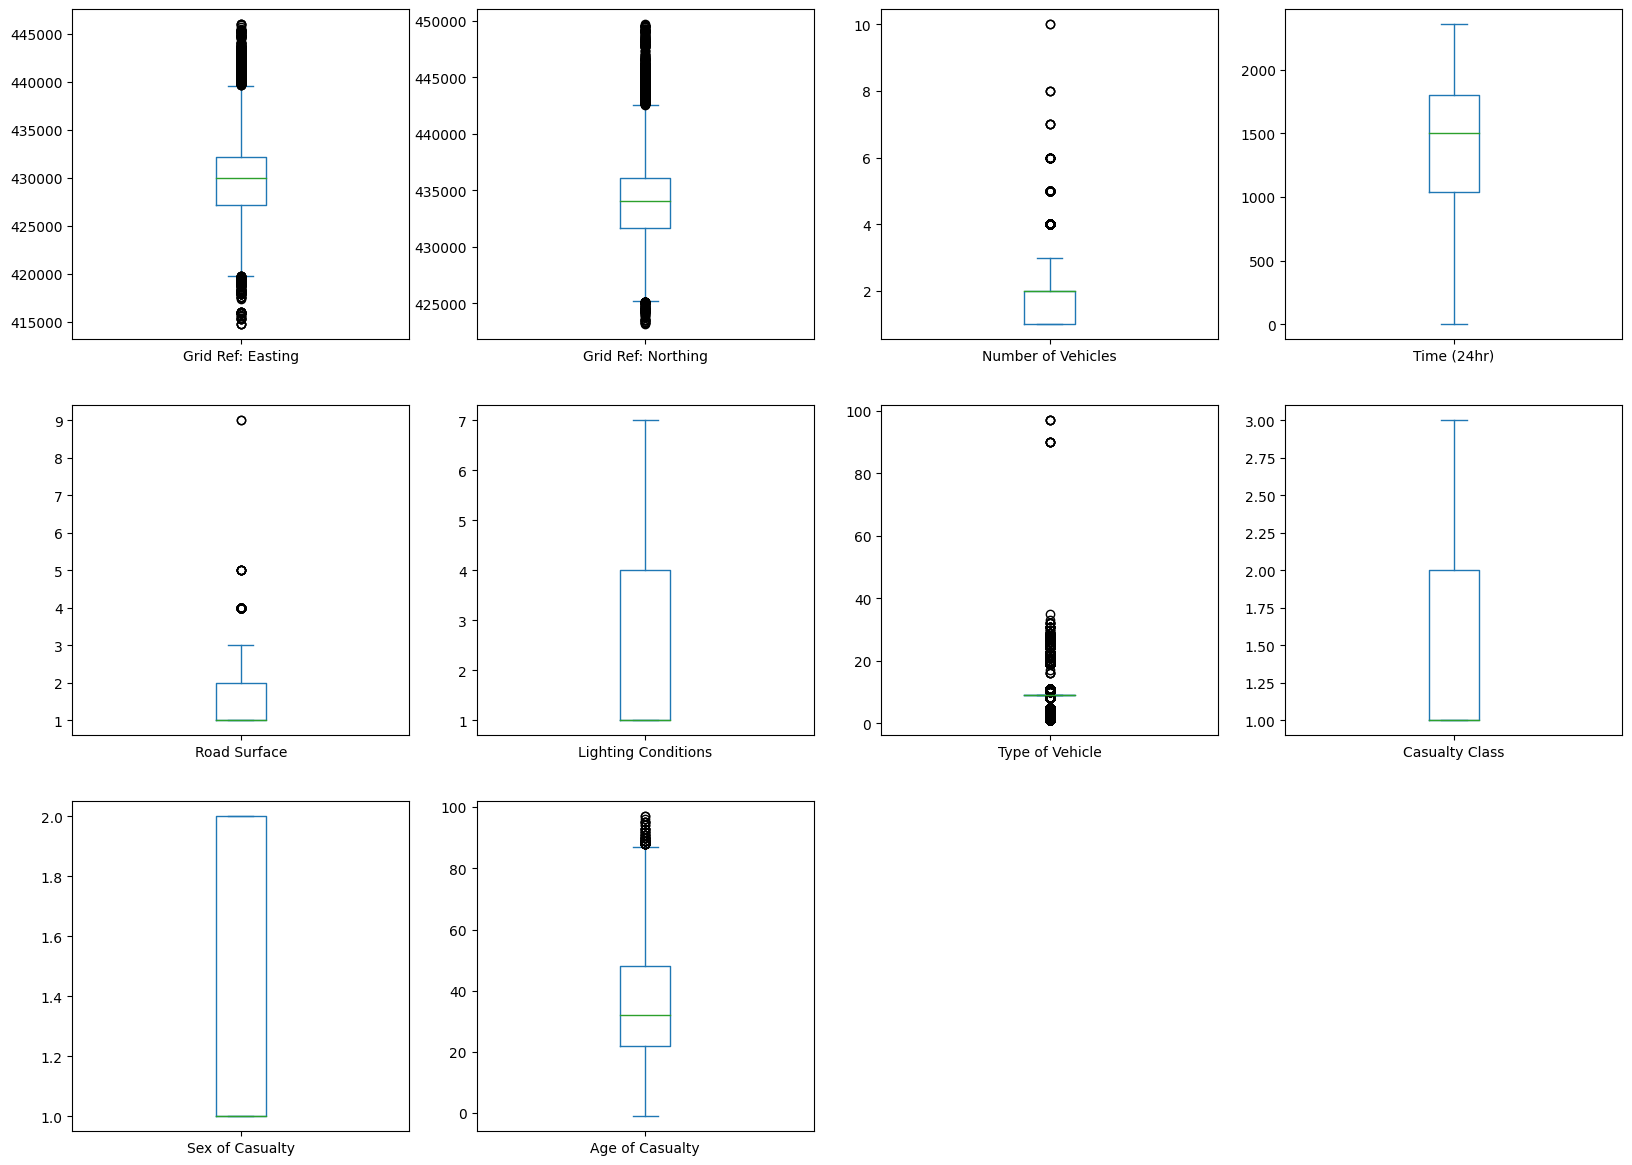

In [37]:
from matplotlib import pyplot as plt
df_all[['Grid Ref: Easting', 'Grid Ref: Northing',
       'Number of Vehicles', 'Time (24hr)', '1st Road Class',
       'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 
        'Sex of Casualty', 'Age of Casualty']].plot(kind ='box', subplots = True, figsize=(20,30),layout = (6,4), )
plt.show()

Distrbution of class:  
 *1 class: 0.8494681326539734
* 2 class:0.1420398677035845
* 3 class:0.00849199964244212 


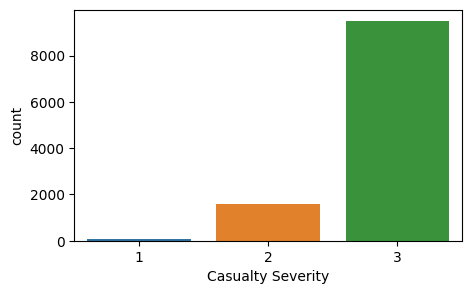

In [38]:
plt.figure(figsize = (5,3))
sns.countplot(data=df_all, x="Casualty Severity")
x = df_all["Casualty Severity"].value_counts()
number_of_all = (list(x))
distribution = []
for i in range(len(number_of_all)):
    distribution.append(number_of_all[i]/sum(number_of_all))
print(f"Distrbution of class:  \n *1 class: {distribution[0]}\n* 2 class:{distribution[1]}\n* 3 class:{distribution[2]} ")

The dataset is imbalanced. It consists less than 1% of (1)Fatal class, 14% of (2)Serious class and almost 85% of (3)Slight Casualty Severity.

### Deal with missing data

In [39]:
df_all.isna().sum()

Reference Number                    1995
Grid Ref: Easting                      0
Grid Ref: Northing                     0
Number of Vehicles                     0
Accident Date                          0
Time (24hr)                            0
1st Road Class                      6932
1st Road Class & No                 8283
Road Surface                           1
Lighting Conditions                    1
Weather Conditions                   282
Local Authority                     7285
Vehicle Number                      7285
Type of Vehicle                       19
Casualty Class                         0
Casualty Severity                      0
Sex of Casualty                        0
Age of Casualty                        0
Accident Fields_Reference Number    9192
Vehicle Fields_Reference Number     9192
Casualty Fields_Reference Number    9192
Casualty Veh No                     9192
Expr1                               8638
Unnamed: 11                         8654
dtype: int64

Using previous analysis, there are several columns to delete.
**Columns to delete:**
- Reference Number
- Accident Date  
- Local Authority
- Accident Fields_Reference Number
- Vehicle Fields_Reference Number
- Casualty Fields_Reference Number
- Casualty Veh No
- Expr1
- Unnamed: 11

In [40]:
to_drop = ['1st Road Class','Vehicle Number', 'Unnamed: 11','Expr1','Accident Fields_Reference Number','Casualty Fields_Reference Number', 'Vehicle Fields_Reference Number']
to_drop.extend(['Reference Number','Accident Date', 'Local Authority', 'Casualty Veh No', '1st Road Class & No'])
important_x = df_all.drop(to_drop, axis = 1)
df_all = important_x

### Cluster the location 

In [41]:
import pandas as pd
from sklearn.cluster import KMeans

# Extract "grid ref east" and "grid ref north" columns into a new DataFrame
grid_ref_data = df_all[['Grid Ref: Easting', 'Grid Ref: Northing']]

# Fit K-means model
kmeans = KMeans(n_clusters=1000) # specify the number of clusters
kmeans.fit(grid_ref_data)

# Assign cluster labels to each grid reference
df_all["Grid Ref: Easting and North"] = kmeans.labels_

In [42]:
df_all = df_all.drop(['Grid Ref: Easting', 'Grid Ref: Northing'], axis = 1)

In [43]:
df_all

,Number of Vehicles,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Grid Ref: Easting and North
0,2,1812,1.0,1.0,1.0,11.0,2,3,2,6,606
1,2,1812,1.0,1.0,1.0,11.0,2,3,1,9,606
2,2,1812,1.0,1.0,1.0,11.0,2,3,2,39,606
3,2,1812,1.0,1.0,1.0,11.0,2,3,1,5,606
4,2,1812,1.0,1.0,1.0,11.0,2,3,2,8,606
...,...,...,...,...,...,...,...,...,...,...,...
2528,1,153,2.0,4.0,1.0,8.0,3,2,1,19,326
2529,2,1310,2.0,1.0,1.0,9.0,2,3,2,15,606
2530,1,830,1.0,1.0,1.0,8.0,2,3,1,71,377
2531,1,50,1.0,7.0,1.0,9.0,3,3,1,23,659


In [44]:
df_clean = df_all

In [45]:
a = list(df_clean.isna().sum())

In [46]:
df_clean.columns

Index(['Number of Vehicles', 'Time (24hr)', 'Road Surface',
       'Lighting Conditions', 'Weather Conditions', 'Type of Vehicle',
       'Casualty Class', 'Casualty Severity', 'Sex of Casualty',
       'Age of Casualty', 'Grid Ref: Easting and North'],
      dtype='object')

In [47]:
df_clean.isna().sum()

Number of Vehicles               0
Time (24hr)                      0
Road Surface                     1
Lighting Conditions              1
Weather Conditions             282
Type of Vehicle                 19
Casualty Class                   0
Casualty Severity                0
Sex of Casualty                  0
Age of Casualty                  0
Grid Ref: Easting and North      0
dtype: int64

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11187 entries, 0 to 2532
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of Vehicles           11187 non-null  int64  
 1   Time (24hr)                  11187 non-null  int64  
 2   Road Surface                 11186 non-null  float64
 3   Lighting Conditions          11186 non-null  float64
 4   Weather Conditions           10905 non-null  object 
 5   Type of Vehicle              11168 non-null  float64
 6   Casualty Class               11187 non-null  int64  
 7   Casualty Severity            11187 non-null  int64  
 8   Sex of Casualty              11187 non-null  int64  
 9   Age of Casualty              11187 non-null  int64  
 10  Grid Ref: Easting and North  11187 non-null  int32  
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 1.2+ MB


In [49]:
df_clean = df_all.dropna(axis = 0)

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 2532
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of Vehicles           10885 non-null  int64  
 1   Time (24hr)                  10885 non-null  int64  
 2   Road Surface                 10885 non-null  float64
 3   Lighting Conditions          10885 non-null  float64
 4   Weather Conditions           10885 non-null  object 
 5   Type of Vehicle              10885 non-null  float64
 6   Casualty Class               10885 non-null  int64  
 7   Casualty Severity            10885 non-null  int64  
 8   Sex of Casualty              10885 non-null  int64  
 9   Age of Casualty              10885 non-null  int64  
 10  Grid Ref: Easting and North  10885 non-null  int32  
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 977.9+ KB


In [51]:
df_clean.isna().sum()

Number of Vehicles             0
Time (24hr)                    0
Road Surface                   0
Lighting Conditions            0
Weather Conditions             0
Type of Vehicle                0
Casualty Class                 0
Casualty Severity              0
Sex of Casualty                0
Age of Casualty                0
Grid Ref: Easting and North    0
dtype: int64

In [52]:
df_all = df_clean

In [53]:
#Convert all values in df for int type
df_all = df_all.astype({"Road Surface": int})
df_all = df_all.astype({"Lighting Conditions": int})
df_all = df_all.astype({"Type of Vehicle": int})
df_all = df_all.astype({"Weather Conditions": int})
df_all = df_all.astype({"Weather Conditions": int})

# 4. Carry out a classification analysis considering the following setting:

In [54]:
df_all = df_all.reset_index()

In [55]:
X = df_all.drop("Casualty Severity", axis=1)
y = df_all['Casualty Severity']

In [56]:
del X["index"]

In [57]:
X.isna().sum()

Number of Vehicles             0
Time (24hr)                    0
Road Surface                   0
Lighting Conditions            0
Weather Conditions             0
Type of Vehicle                0
Casualty Class                 0
Sex of Casualty                0
Age of Casualty                0
Grid Ref: Easting and North    0
dtype: int64

# 4 Models

In [58]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [59]:
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 123)

def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]
        y_tr = y.values[train]
        X_val = X.values[val]
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val,y_pred,output_dict = True)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
    
    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean()

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg 


In [60]:
all_accuracy = []
all_f1 = []
all_precision = []
all_recall = []

def metrics_all(df_metrics):
    f1 = df_metrics.iloc[0][0]
    precision = df_metrics.iloc[1][0]
    recall = df_metrics.iloc[2][0]
    all_f1.append(f1)
    all_precision.append(precision)
    all_recall.append(recall)
    
    return f1, precision, recall

In [61]:
DT_accuracy = []
DT_f1 = []
DT_precision = []
DT_recall = []

def metrics(df_metrics):
    f1 = df_metrics.iloc[0][0]
    precision = df_metrics.iloc[1][0]
    recall = df_metrics.iloc[2][0]
    DT_f1.append(f1)
    DT_precision.append(precision)
    DT_recall.append(recall)
    
    return f1, precision, recall

## 4.1.1. Decision tree

accuracy 0.7653627687300816


,1,2,3,macro avg,weighted avg
f1-score,0.130798,0.251152,0.864084,0.415345,0.769868
precision,0.126337,0.240736,0.871684,0.412919,0.774788
recall,0.140000,0.263023,0.856677,0.419900,0.765363
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


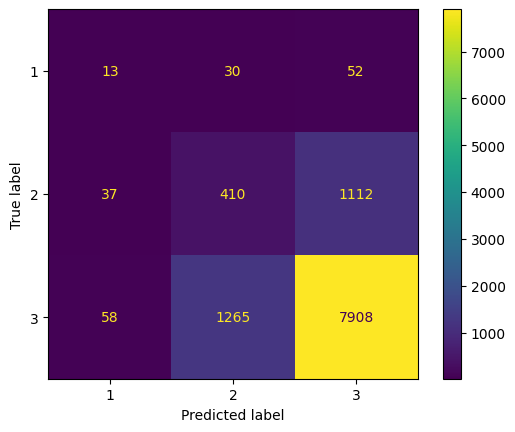

In [62]:
estimators = [('scaling',StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=123))]
pipe_1 = Pipeline(estimators)
df_metrics_1, acc_1 = eval_cross_validation(pipe_1, X, y)
print('accuracy',acc_1)
display(df_metrics_1)
y_pred_1 = cross_val_predict(pipe_1, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_1)
plt.show()

### Hyperparameters tuning 

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [2, 4, 6, 8, 10],
    "clf__min_samples_split": [2, 4, 6, 8, 10],
    "clf__min_samples_leaf": [1, 2, 4, 6, 8, 10],
}

# Perform grid search
grid_search = GridSearchCV(pipe_1, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 2}


## 4.1.1.2 Decision tree with hyperparmetrs 
Decision criterion='entropy', min_samples_leaf=2, min_samples_split=2

accuracy 0.7597602866904338


,1,2,3,macro avg,weighted avg
f1-score,0.141141,0.278799,0.859765,0.426568,0.770276
precision,0.114531,0.255768,0.878335,0.416212,0.782497
recall,0.191111,0.307246,0.842055,0.446804,0.759760
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


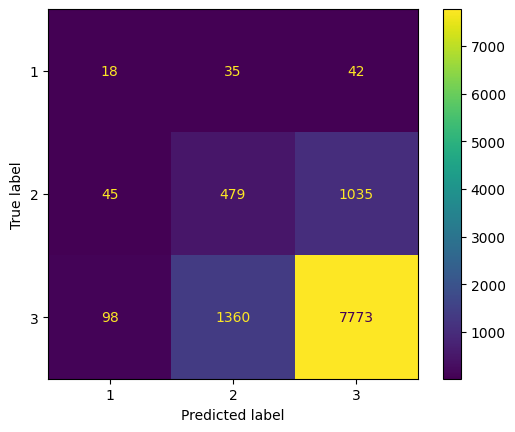

In [64]:
estimators = [('scaling',StandardScaler()),
                ('clf', DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, min_samples_split=2, random_state=123))]
pipe_1 = Pipeline(estimators)
df_metrics_1, acc_1 = eval_cross_validation(pipe_1, X, y)
print('accuracy',acc_1)
display(df_metrics_1)
y_pred_1 = cross_val_predict(pipe_1, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_1)
plt.show()

In [65]:
metrics(df_metrics_1),
DT_accuracy.append(acc_1)

## 4.1.2 Decision tree with SMOTE

accuracy 0.7177761910549344


,1,2,3,macro avg,weighted avg
f1-score,0.092493,0.280602,0.829852,0.400982,0.744754
precision,0.064613,0.231703,0.880812,0.392376,0.780725
recall,0.167778,0.356046,0.784530,0.436118,0.717776
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


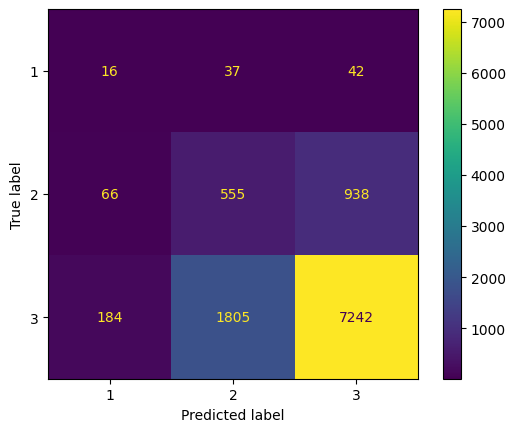

In [66]:
estimators = [('sampling', SMOTE(random_state = 123)),
                ('scaling',StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=123))]
pipe_2 = Pipeline(estimators)
df_metrics_2, acc_2 = eval_cross_validation(pipe_2, X, y)
print('accuracy',acc_2)
display(df_metrics_2)
y_pred_2 = cross_val_predict(pipe_2, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_2)
plt.show()

In [67]:
metrics(df_metrics_2),
DT_accuracy.append(acc_2)

# Decision tree with undersampling

accuracy 0.4691768115648463


,1,2,3,macro avg,weighted avg
f1-score,0.030260,0.244017,0.629888,0.301388,0.569384
precision,0.015682,0.178438,0.906931,0.367017,0.794817
recall,0.433333,0.387436,0.483374,0.434715,0.469177
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


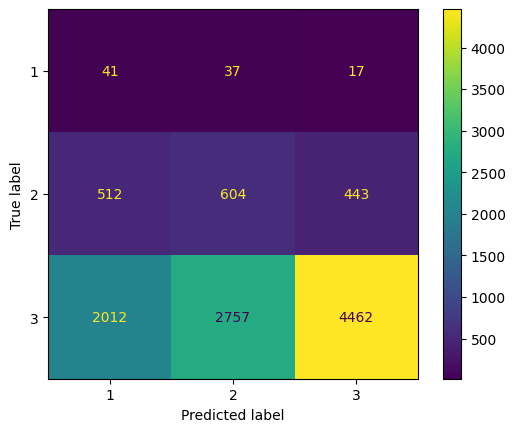

In [68]:
estimators = [('sampling', RandomUnderSampler(random_state=123)),
                ('scaling',StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=123))]
pipe_3 = Pipeline(estimators)
df_metrics_3, acc_3 = eval_cross_validation(pipe_3, X, y)
print('accuracy',acc_3)
display(df_metrics_3)
y_pred_3 = cross_val_predict(pipe_3, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_3)
plt.show()

In [69]:
metrics(df_metrics_3)
DT_accuracy.append(acc_3)

# Comparing the Decision Trees

In [70]:
# Create a dictionary with the evaluation metrics
metrics_dict_dt = {
    "Classifier": ["DT", "DT SMOTE", "DT Undersampling"],
    "Accuracy": DT_accuracy,
    "Precision": DT_precision,
    "Recall": DT_recall,
    "F1-measure": DT_f1
    # add additional metrics here
}

# Create a pandas DataFrame from the dictionary
df_dt = pd.DataFrame(metrics_dict_dt)

# Print the DataFrame
df_dt

,Classifier,Accuracy,Precision,Recall,F1-measure
0,DT,0.759760,0.114531,0.191111,0.141141
1,DT SMOTE,0.717776,0.064613,0.167778,0.092493
2,DT Undersampling,0.469177,0.015682,0.433333,0.030260


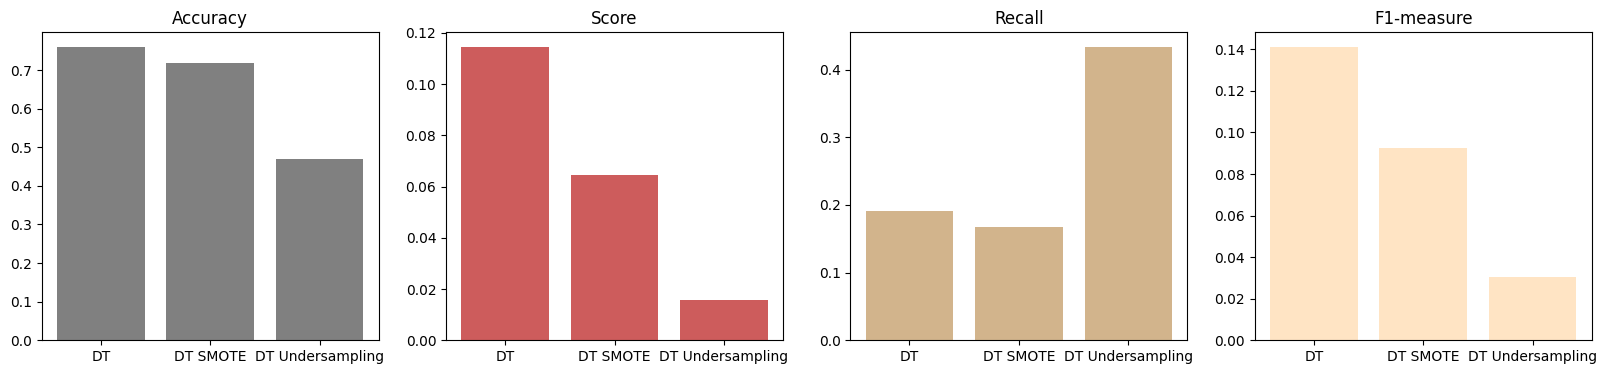

In [71]:
plt.figure(figsize=(20,4))
 
plt.subplot(1,4,1)
plt.bar(df_dt["Classifier"], df_dt["Accuracy"], color="grey")
plt.title("Accuracy")
 
plt.subplot(1,4,2)
plt.bar(df_dt["Classifier"], df_dt["Precision"], color="indianred")
plt.title("Score")
 
plt.subplot(1,4,3)
plt.bar(df_dt["Classifier"], df_dt["Recall"], color="tan")
plt.title("Recall")

plt.subplot(1,4,4)
plt.bar(df_dt["Classifier"], df_dt["F1-measure"], color="bisque")
plt.title("F1-measure")

plt.show()

In [72]:
metrics_all(df_metrics_1)
all_accuracy.append(acc_1)

# RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

RF_accuracy = []
RF_f1 = []
RF_precision = []
RF_recall = []

def metrics_rf(df_metrics):
    f1 = df_metrics.iloc[0][0]
    precision = df_metrics.iloc[1][0]
    recall = df_metrics.iloc[2][0]
    RF_f1.append(f1)
    RF_precision.append(precision)
    RF_recall.append(recall)
    
    return f1, precision, recall

## 4.2.1 Random forest

/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy 0.8377588552638688


,1,2,3,macro avg,weighted avg
f1-score,0.144545,0.156250,0.911118,0.403971,0.796310
precision,0.550000,0.350812,0.858987,0.586600,0.783484
recall,0.084444,0.100699,0.969992,0.385045,0.837759
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


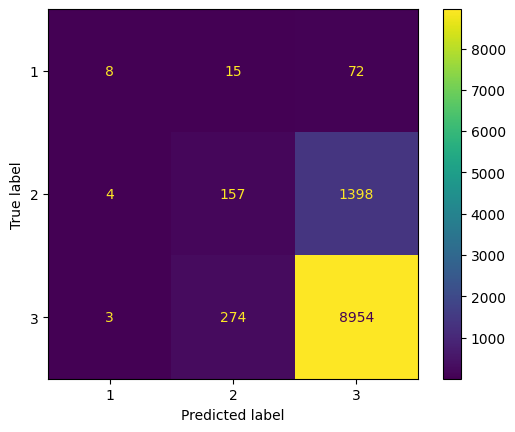

In [74]:
estimators = [('scaling',StandardScaler()),
                ('clf', RandomForestClassifier(random_state=123))]
pipe_RF1 = Pipeline(estimators)
df_metrics_RF1, acc_RF1 = eval_cross_validation(pipe_RF1, X, y)
print('accuracy',acc_RF1)
display(df_metrics_RF1)
y_pred_RF1 = cross_val_predict(pipe_RF1, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_RF1)
plt.show()

In [75]:
metrics_rf(df_metrics_RF1)
RF_accuracy.append(acc_RF1)

In [76]:
# Define the hyperparameters to be tuned
param_grid = {
    "clf__n_estimators": [100, 200, 300],
    "clf__max_depth": [2, 4, 6, 8, 10],
    "clf__min_samples_split": [2, 4, 6, 8, 10],
    "clf__min_samples_leaf": [1, 2, 4, 6, 8, 10],
}

# Perform grid search
grid_search = GridSearchCV(pipe_RF1, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'clf__max_depth': 8, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 8, 'clf__n_estimators': 100}


This parameters have the same vaule as the first Random Forest.
- 'clf__min_samples_leaf': 2
- 'clf__n_estimators': 100
The max_depth set on 8 has poorly f1 score on 1 class.
- clf__max_depth': 8 
After set min_samples_split=6, the accuracy has grown, but the F1 score has decreased.

/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mar

accuracy 0.8406989345324906


,1,2,3,macro avg,weighted avg
f1-score,0.148182,0.130019,0.913028,0.397076,0.794203
precision,0.650000,0.354908,0.856992,0.620633,0.783212
recall,0.084444,0.080174,0.976926,0.380515,0.840699
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


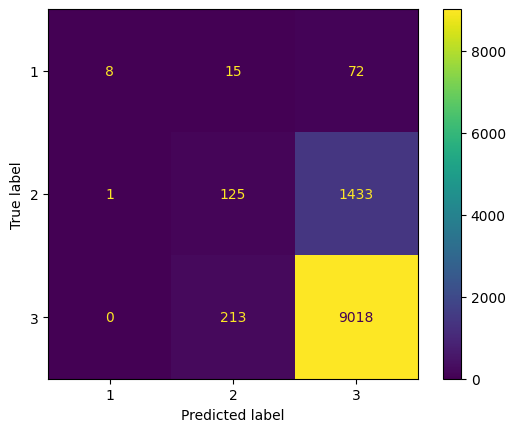

In [77]:
estimators = [('scaling',StandardScaler()),
                ('clf', RandomForestClassifier(min_samples_split=6, random_state=123))]
pipe_RF11 = Pipeline(estimators)
df_metrics_RF11, acc_RF11 = eval_cross_validation(pipe_RF11, X, y)
print('accuracy',acc_RF11)
display(df_metrics_RF11)
y_pred_RF11 = cross_val_predict(pipe_RF11, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_RF11)
plt.show()

## 4.2.2. Randomforest balanced

accuracy 0.7638050795387026


,1,2,3,macro avg,weighted avg
f1-score,0.098195,0.221782,0.863957,0.394645,0.765293
precision,0.105160,0.219156,0.866351,0.396889,0.767008
recall,0.095556,0.225136,0.861663,0.394118,0.763805
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


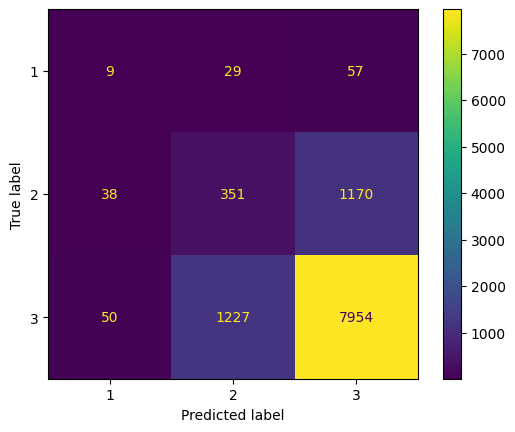

In [78]:
estimators = [('scaling',StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=123, class_weight='balanced'))]
pipe_RF2 = Pipeline(estimators)
df_metrics_RF2, acc_RF2 = eval_cross_validation(pipe_RF2, X, y)
print('accuracy',acc_RF2)
display(df_metrics_RF2)
y_pred_RF2 = cross_val_predict(pipe_RF2, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_RF2)
plt.show()

In [79]:
metrics_rf(df_metrics_RF2)
RF_accuracy.append(acc_RF2)

## 4.2.3. Random Forest with SMOTE

accuracy 0.7177761910549344


,1,2,3,macro avg,weighted avg
f1-score,0.092493,0.280602,0.829852,0.400982,0.744754
precision,0.064613,0.231703,0.880812,0.392376,0.780725
recall,0.167778,0.356046,0.784530,0.436118,0.717776
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


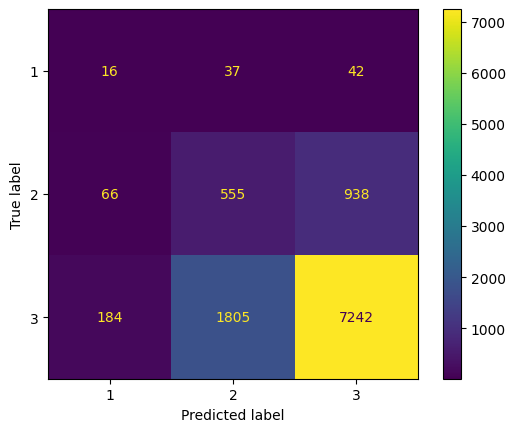

In [80]:
estimators = [('sampling', SMOTE(random_state = 123)),
                ('scaling',StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=123, class_weight='balanced'))]
pipe_RF3 = Pipeline(estimators)
df_metrics_RF3, acc_RF3 = eval_cross_validation(pipe_RF3, X, y)
print('accuracy',acc_RF3)
display(df_metrics_RF3)
y_pred_RF3 = cross_val_predict(pipe_RF3, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_RF3)
plt.show()

In [81]:
metrics_rf(df_metrics_RF3)
RF_accuracy.append(acc_RF3)

## 4.2.4. Random Forest with Undersampling

accuracy 0.4691768115648463


,1,2,3,macro avg,weighted avg
f1-score,0.030260,0.244017,0.629888,0.301388,0.569384
precision,0.015682,0.178438,0.906931,0.367017,0.794817
recall,0.433333,0.387436,0.483374,0.434715,0.469177
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


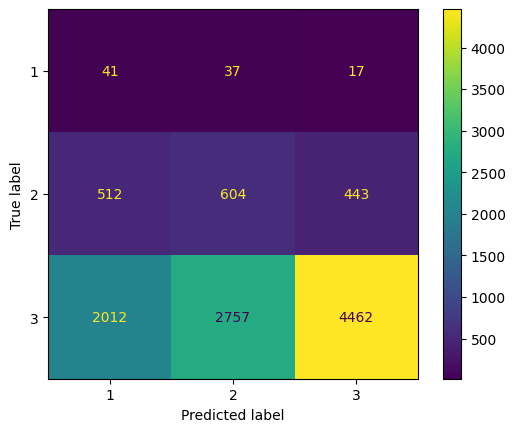

In [82]:
estimators = [('sampling', RandomUnderSampler(random_state=123)),
                ('scaling',StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=123, class_weight='balanced'))]
pipe_RF4 = Pipeline(estimators)
df_metrics_RF4, acc_RF4 = eval_cross_validation(pipe_RF4, X, y)
print('accuracy',acc_RF4)
display(df_metrics_RF4)
y_pred_RF4 = cross_val_predict(pipe_RF4, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_RF4)
plt.show()

In [83]:
metrics_rf(df_metrics_RF4)
RF_accuracy.append(acc_RF4)

### Comparing Random Forest

In [84]:
# Create a dictionary with the evaluation metrics
metrics_dict_RF = {
    "Classifier": ["RF", "RF balance", "RF SMOTE", "RF Undersampling"],
    "Accuracy": RF_accuracy,
    "Precision": RF_precision,
    "Recall": RF_recall,
    "F1-measure": RF_f1
    # add additional metrics here
}

# Create a pandas DataFrame from the dictionary
df_RF = pd.DataFrame(metrics_dict_RF)

# Print the DataFrame
df_RF

,Classifier,Accuracy,Precision,Recall,F1-measure
0,RF,0.837759,0.550000,0.084444,0.144545
1,RF balance,0.763805,0.105160,0.095556,0.098195
2,RF SMOTE,0.717776,0.064613,0.167778,0.092493
3,RF Undersampling,0.469177,0.015682,0.433333,0.030260


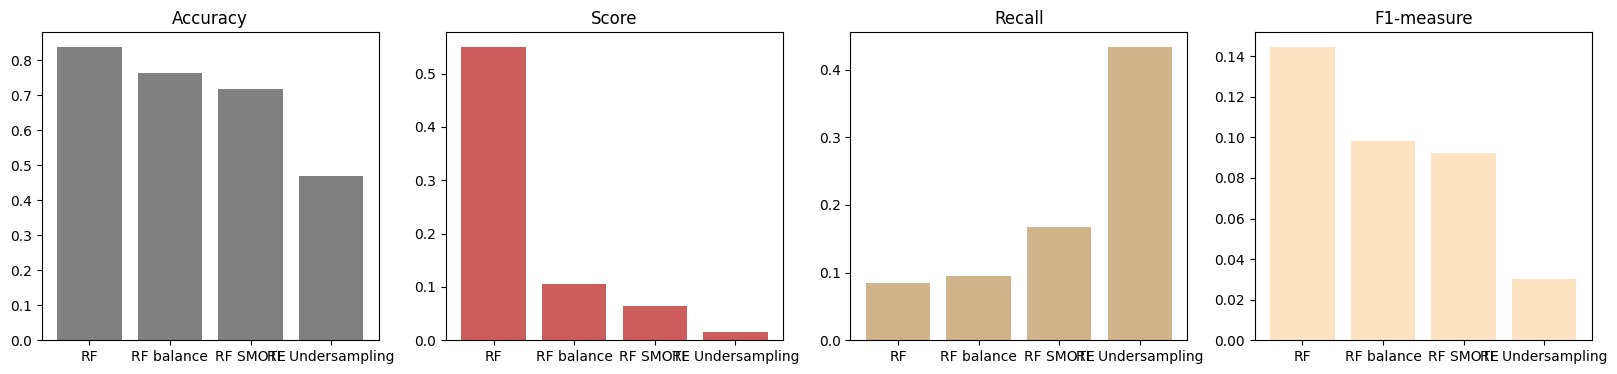

In [85]:
plt.figure(figsize=(20,4))
 
plt.subplot(1,4,1)
plt.bar(df_RF["Classifier"], df_RF["Accuracy"], color="grey")
plt.title("Accuracy")
 
plt.subplot(1,4,2)
plt.bar(df_RF["Classifier"], df_RF["Precision"], color="indianred")
plt.title("Score")
 
plt.subplot(1,4,3)
plt.bar(df_RF["Classifier"], df_RF["Recall"], color="tan")
plt.title("Recall")

plt.subplot(1,4,4)
plt.bar(df_RF["Classifier"], df_RF["F1-measure"], color="bisque")
plt.title("F1-measure")

plt.show()

In [86]:
metrics_all(df_metrics_RF1)
all_accuracy.append(acc_RF1)

# Naive Bayes

In [87]:
NB_accuracy = []
NB_f1 = []
NB_precision = []
NB_recall = []

def metrics_nb(df_metrics):
    f1 = df_metrics.iloc[0][0]
    precision = df_metrics.iloc[1][0]
    recall = df_metrics.iloc[2][0]
    NB_f1.append(f1)
    NB_precision.append(precision)
    NB_recall.append(recall)
    
    return f1, precision, recall

## 4.3.1. Naive Bayes

accuracy 0.539273247177659


,1,2,3,macro avg,weighted avg
f1-score,0.027411,0.205540,0.685526,0.306159,0.611043
precision,0.024210,0.146036,0.855473,0.341906,0.746617
recall,0.063333,0.373966,0.572098,0.336466,0.539273
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


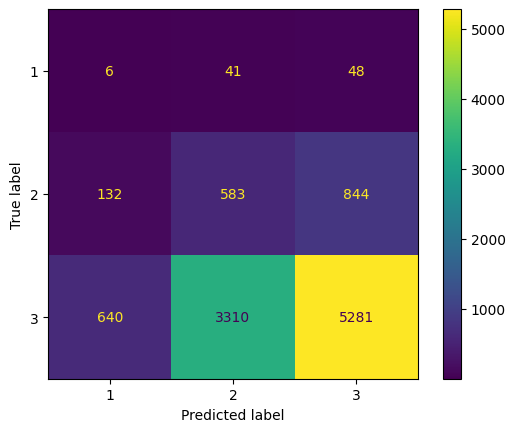

In [89]:
from sklearn.naive_bayes import MultinomialNB

X_NB = abs(X)
estimators = [('clf', MultinomialNB())]
pipe_NB1 = Pipeline(estimators)
df_metrics_NB1, acc_NB1 = eval_cross_validation(pipe_NB1, X_NB, y)
print('accuracy',acc_NB1)
display(df_metrics_NB1)
y_pred_NB1 = cross_val_predict(pipe_NB1, X_NB, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_NB1)
plt.show()

In [91]:
# Define the hyperparameters to be tuned
param_grid = [{'clf__alpha': [0.1, 1, 10],
               'clf__fit_prior': [True, False]}]

# Perform grid search
grid_search = GridSearchCV(pipe_NB1, param_grid, cv=5)
grid_search.fit(X_NB, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'clf__alpha': 0.1, 'clf__fit_prior': True}


accuracy 0.5382626397666505


,1,2,3,macro avg,weighted avg
f1-score,0.024326,0.205307,0.684880,0.304838,0.610433
precision,0.019265,0.145542,0.855418,0.340075,0.746454
recall,0.063333,0.372043,0.571231,0.335536,0.538263
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


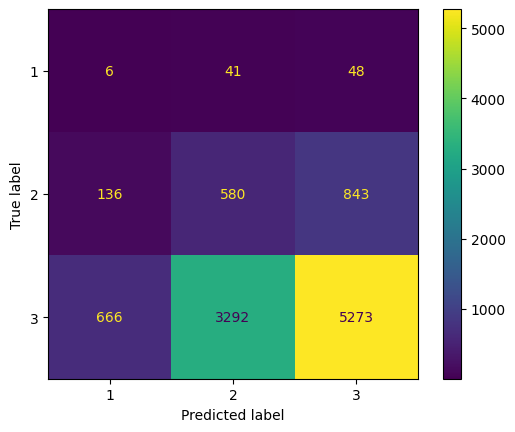

In [93]:
estimators = [('clf', MultinomialNB(alpha=10, fit_prior=True))]
pipe_NB11 = Pipeline(estimators)
df_metrics_NB11, acc_NB11 = eval_cross_validation(pipe_NB11, X_NB, y)
print('accuracy',acc_NB11)
display(df_metrics_NB11)
y_pred_NB11 = cross_val_predict(pipe_NB11, X_NB, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_NB11)
plt.show()

In [94]:
metrics_nb(df_metrics_NB1)
NB_accuracy.append(acc_NB1)

## 4.3.2. Naive Bayes with SMOTE

accuracy 0.4016593913736294


,1,2,3,macro avg,weighted avg
f1-score,0.020235,0.208819,0.545074,0.258043,0.492340
precision,0.010599,0.147162,0.862756,0.340172,0.752826
recall,0.243333,0.396402,0.404185,0.347973,0.401659
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


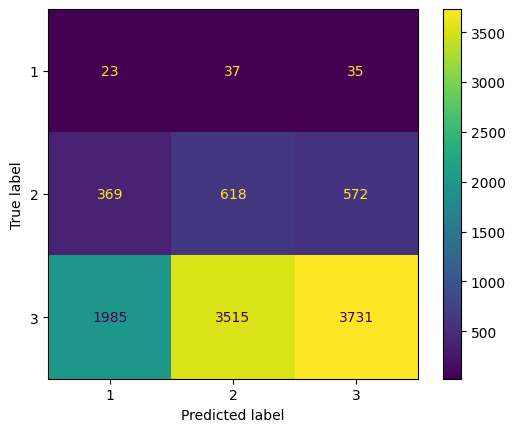

In [96]:
from sklearn.naive_bayes import MultinomialNB

estimators = [('sampling', SMOTE(random_state=123)),
                ('clf', MultinomialNB())]
pipe_NB2 = Pipeline(estimators)
df_metrics_NB2, acc_NB2 = eval_cross_validation(pipe_NB2, X_NB, y)
print('accuracy',acc_NB2)
display(df_metrics_NB2)
y_pred_NB2 = cross_val_predict(pipe_NB2, X_NB, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_NB2)
plt.show()

In [116]:
# Define the hyperparameters to be tuned
param_grid = [{'clf__alpha': [0.1, 1, 10],
               'clf__fit_prior': [True, False]}]

# Perform grid search
grid_search = GridSearchCV(pipe_NB3, param_grid, cv=5)
grid_search.fit(X_NB, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'clf__alpha': 10, 'clf__fit_prior': True}


The same parameters as before.

In [97]:
metrics_nb(df_metrics_NB2)
NB_accuracy.append(acc_NB2)

## 4.3.3. Naive Bayes with undersampling

accuracy 0.42736607384000436


,1,2,3,macro avg,weighted avg
f1-score,0.031331,0.209559,0.569144,0.270011,0.512931
precision,0.017804,0.162339,0.862375,0.347506,0.754746
recall,0.317778,0.370852,0.438101,0.375577,0.427366
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


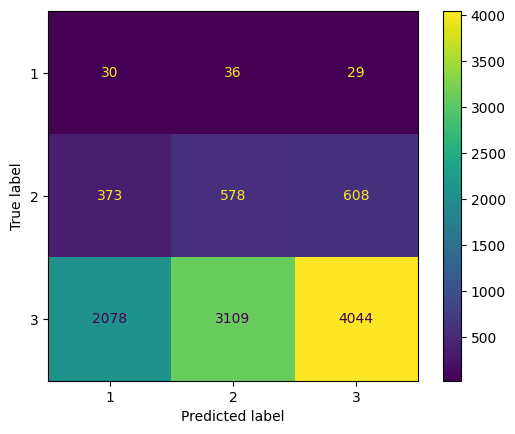

In [98]:
from sklearn.naive_bayes import MultinomialNB

estimators = [('sampling', RandomUnderSampler(random_state=123)),
                ('clf', MultinomialNB())]
pipe_NB3 = Pipeline(estimators)
df_metrics_NB3, acc_NB3 = eval_cross_validation(pipe_NB3, X_NB, y)
print('accuracy',acc_NB3)
display(df_metrics_NB3)
y_pred_NB3 = cross_val_predict(pipe_NB3, X_NB, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_NB3)
plt.show()

In [99]:
metrics_nb(df_metrics_NB3)
NB_accuracy.append(acc_NB3)

### Naive Bayes comparing

In [100]:
# Create a dictionary with the evaluation metrics
metrics_dict_NB = {
    "Classifier": ["NB", "NB balance", "NB with SMOTE"],
    "Accuracy": NB_accuracy,
    "Precision": NB_precision,
    "Recall": NB_recall,
    "F1-measure": NB_f1
}

# Create a pandas DataFrame from the dictionary
df_NB = pd.DataFrame(metrics_dict_NB)

# Print the DataFrame
df_NB

,Classifier,Accuracy,Precision,Recall,F1-measure
0,NB,0.539273,0.024210,0.063333,0.027411
1,NB balance,0.401659,0.010599,0.243333,0.020235
2,NB with SMOTE,0.427366,0.017804,0.317778,0.031331


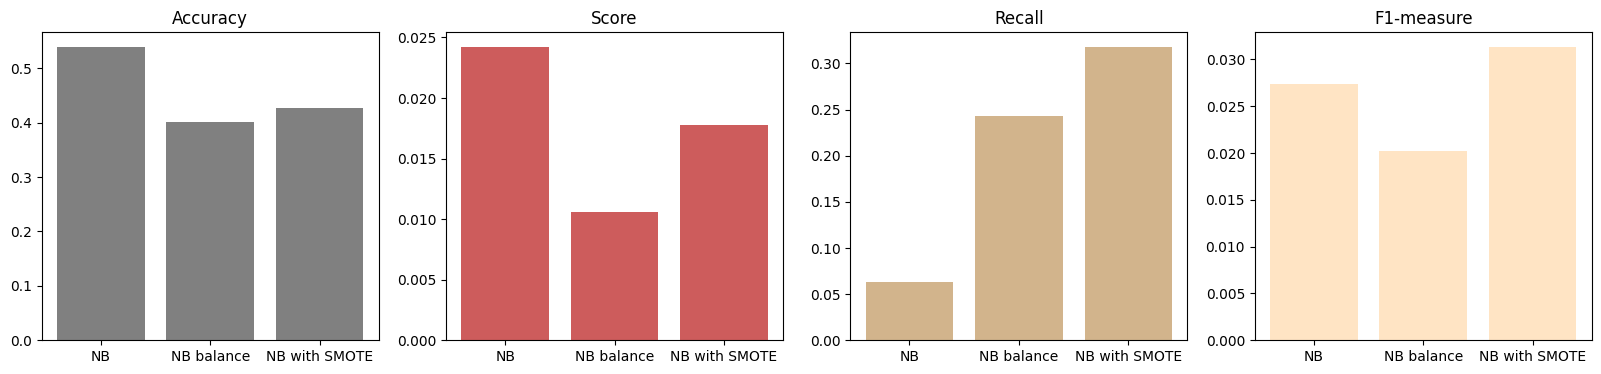

In [101]:
plt.figure(figsize=(20,4))
 
plt.subplot(1,4,1)
plt.bar(df_NB["Classifier"], df_NB["Accuracy"], color="grey")
plt.title("Accuracy")
 
plt.subplot(1,4,2)
plt.bar(df_NB["Classifier"], df_NB["Precision"], color="indianred")
plt.title("Score")
 
plt.subplot(1,4,3)
plt.bar(df_NB["Classifier"], df_NB["Recall"], color="tan")
plt.title("Recall")

plt.subplot(1,4,4)
plt.bar(df_NB["Classifier"], df_NB["F1-measure"], color="bisque")
plt.title("F1-measure")

plt.show()

In [102]:
metrics_all(df_metrics_NB1)
all_accuracy.append(acc_NB1)

# Logistic Regression

In [103]:
LR_accuracy = []
LR_f1 = []
LR_precision = []
LR_recall = []

def metrics_lr(df_metrics):
    f1 = df_metrics.iloc[0][0]
    precision = df_metrics.iloc[1][0]
    recall = df_metrics.iloc[2][0]
    LR_f1.append(f1)
    LR_precision.append(precision)
    LR_recall.append(recall)
    
    return f1, precision, recall

## 4.4.1. Logistic Regression

/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mar

accuracy 0.8480479089018529


/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marysia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,macro avg,weighted avg
f1-score,0.0,0.0,0.917777,0.305926,0.778319
precision,0.0,0.0,0.848048,0.282683,0.719185
recall,0.0,0.0,1.000000,0.333333,0.848048
support,9.5,155.9,923.100000,1088.500000,1088.500000


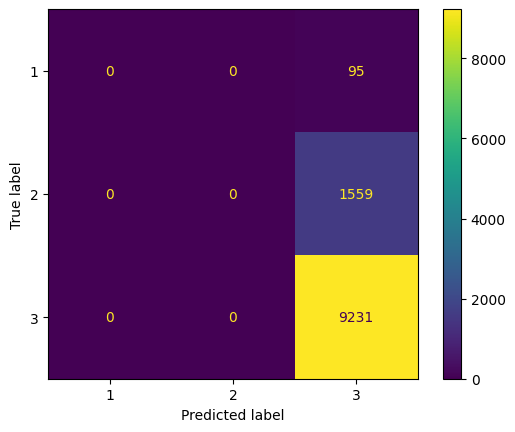

In [104]:
from sklearn.linear_model import LogisticRegression

estimators = [('scaling',StandardScaler()),
                ('clf', LogisticRegression(multi_class='multinomial'))]
pipe_LR1 = Pipeline(estimators)
df_metrics_LR1, acc_LR1 = eval_cross_validation(pipe_LR1, X, y)
print('accuracy',acc_LR1)
display(df_metrics_LR1)
y_pred_LR1 = cross_val_predict(pipe_LR1, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_LR1)
plt.show()

In [105]:
metrics_lr(df_metrics_LR1)
LR_accuracy.append(acc_LR1)

## 4.4.2. Logistic Regression with SMOTE

accuracy 0.5098770120996057


,1,2,3,macro avg,weighted avg
f1-score,0.031842,0.242503,0.674097,0.316147,0.606677
precision,0.016535,0.186734,0.902181,0.368483,0.791984
recall,0.431111,0.346394,0.538297,0.438601,0.509877
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


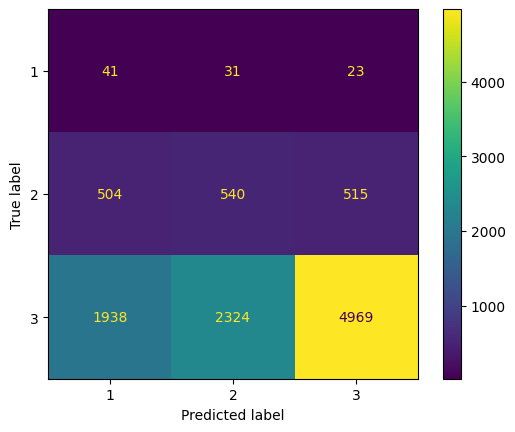

In [106]:
from sklearn.linear_model import LogisticRegression

estimators = [('scaling',StandardScaler()),
              ('sampling', SMOTE(random_state=123)),
                ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs'))]
pipe_LR2 = Pipeline(estimators)
df_metrics_LR2, acc_LR2 = eval_cross_validation(pipe_LR2, X, y)
print('accuracy',acc_LR2)
display(df_metrics_LR2)
y_pred_LR2 = cross_val_predict(pipe_LR2, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_LR2)
plt.show()

In [107]:
# Define the hyperparameters to be tuned
param_grid = [{'clf__C': [0.1, 1, 10, 100],
               'clf__penalty': ['l2']
              }]
# Perform grid search
grid_search = GridSearchCV(pipe_LR2, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'clf__C': 0.1, 'clf__penalty': 'l2'}


The hyperparamters are the same as for the previous model.

In [108]:
metrics_lr(df_metrics_LR2)
LR_accuracy.append(acc_LR2)

## 4.4.3. Logistic Regression with undersampling

accuracy 0.5225539148166154


,1,2,3,macro avg,weighted avg
f1-score,0.032184,0.237746,0.684302,0.318077,0.614648
precision,0.016784,0.181515,0.897681,0.365327,0.787422
recall,0.393333,0.347680,0.553464,0.431492,0.522554
support,9.500000,155.900000,923.100000,1088.500000,1088.500000


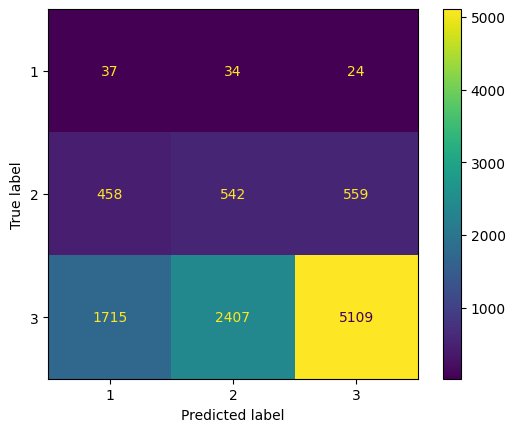

In [109]:
from sklearn.linear_model import LogisticRegression

estimators = [('sampling', RandomUnderSampler(random_state=123)),
                ('scaling',StandardScaler()),
                ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs'))]
pipe_LR3 = Pipeline(estimators)
df_metrics_LR3, acc_LR3 = eval_cross_validation(pipe_LR3, X, y)
print('accuracy',acc_LR3)
display(df_metrics_LR3)
y_pred_LR3 = cross_val_predict(pipe_LR3, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred_LR3)
plt.show()

In [110]:
metrics_lr(df_metrics_LR3)
LR_accuracy.append(acc_LR3)

### Logistic Regression comparing

In [111]:
# Create a dictionary with the evaluation metrics
metrics_dict_LR = {
    "Classifier": ["LR", "LR SMOTE", "LR Undersampling"],
    "Accuracy": LR_accuracy,
    "Precision": LR_precision,
    "Recall": LR_recall,
    "F1-measure": LR_f1
}

# Create a pandas DataFrame from the dictionary
df_LR = pd.DataFrame(metrics_dict_LR)

# Print the DataFrame
df_LR

,Classifier,Accuracy,Precision,Recall,F1-measure
0,LR,0.848048,0.000000,0.000000,0.000000
1,LR SMOTE,0.509877,0.016535,0.431111,0.031842
2,LR Undersampling,0.522554,0.016784,0.393333,0.032184


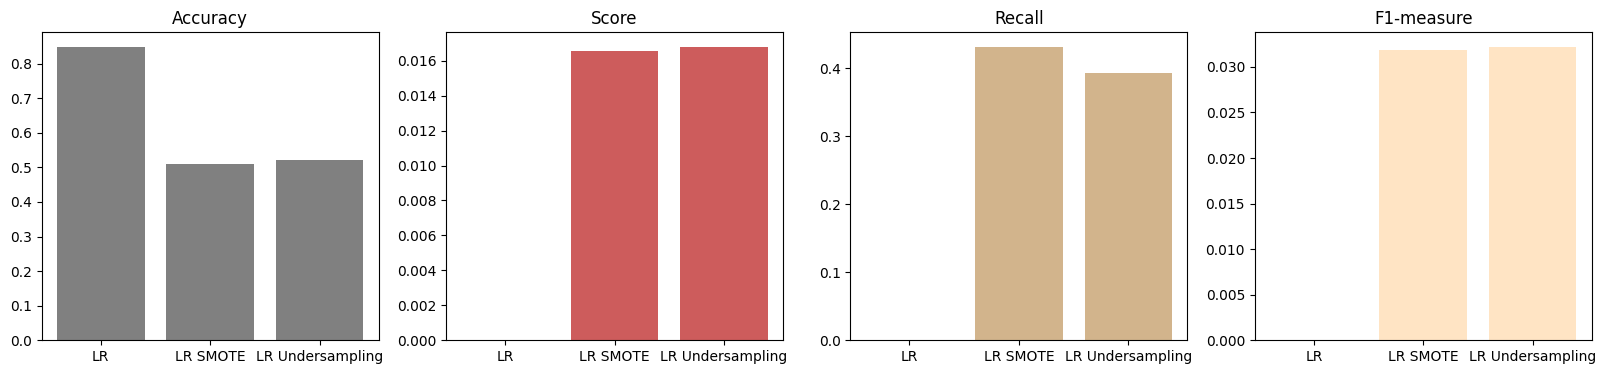

In [112]:
plt.figure(figsize=(20,4))
 
plt.subplot(1,4,1)
plt.bar(df_LR["Classifier"], df_LR["Accuracy"], color="grey")
plt.title("Accuracy")
 
plt.subplot(1,4,2)
plt.bar(df_LR["Classifier"], df_LR["Precision"], color="indianred")
plt.title("Score")
 
plt.subplot(1,4,3)
plt.bar(df_LR["Classifier"], df_LR["Recall"], color="tan")
plt.title("Recall")

plt.subplot(1,4,4)
plt.bar(df_LR["Classifier"], df_LR["F1-measure"], color="bisque")
plt.title("F1-measure")

plt.show()

In [113]:
metrics_all(df_metrics_LR2)
all_accuracy.append(acc_LR2)

# 5. Select the best models

In [114]:
# Create a dictionary with the evaluation metrics
metrics_dict_dt = {
    "Classifier": ["DT", "RF", "NB", "LR SMOTE"],
    "Accuracy": all_accuracy,
    "Precision": all_precision,
    "Recall": all_recall,
    "F1-measure": all_f1
    # add additional metrics here
}

# Create a pandas DataFrame from the dictionary
df_calssifier = pd.DataFrame(metrics_dict_dt)

# Print
df_calssifier

,Classifier,Accuracy,Precision,Recall,F1-measure
0,DT,0.759760,0.114531,0.191111,0.141141
1,RF,0.837759,0.550000,0.084444,0.144545
2,NB,0.539273,0.024210,0.063333,0.027411
3,LR SMOTE,0.509877,0.016535,0.431111,0.031842


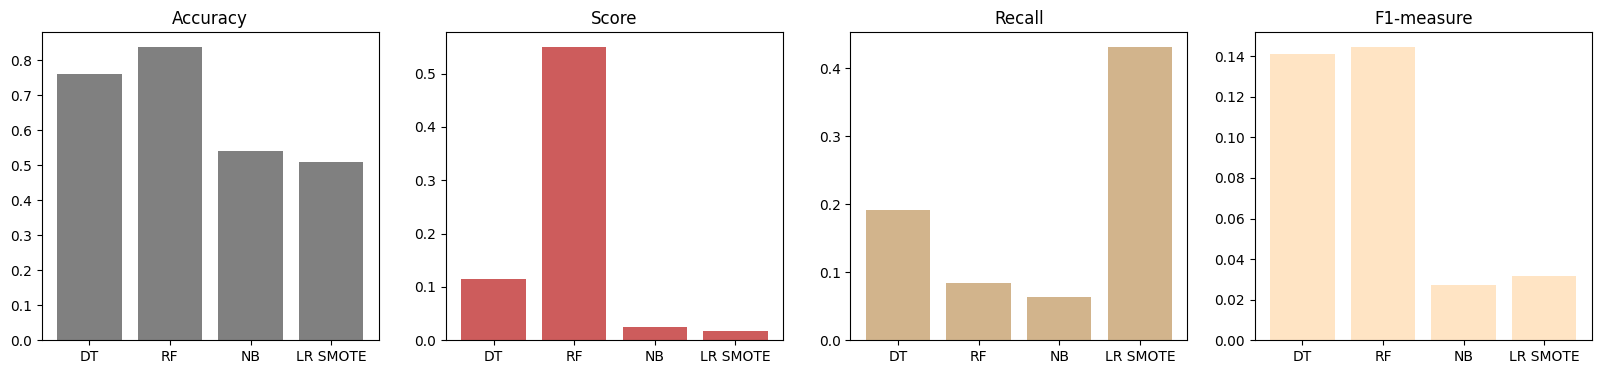

In [115]:
plt.figure(figsize=(20,4))
 
plt.subplot(1,4,1)
plt.bar(df_calssifier["Classifier"], df_calssifier["Accuracy"], color="grey")
plt.title("Accuracy")
 
plt.subplot(1,4,2)
plt.bar(df_calssifier["Classifier"], df_calssifier["Precision"], color="indianred")
plt.title("Score")
 
plt.subplot(1,4,3)
plt.bar(df_calssifier["Classifier"], df_calssifier["Recall"], color="tan")
plt.title("Recall")

plt.subplot(1,4,4)
plt.bar(df_calssifier["Classifier"], df_calssifier["F1-measure"], color="bisque")
plt.title("F1-measure")

plt.show()

The highest Accuracy and F1 score was achived by Random Forest. Which is concluded in pipe_RF1.